# Sarcastic Reddit Post Generator



![alt text](https://i.redd.it/c7iivha8b6y31.png)

The goal of our project is to generate sarcastic reddit posts from pre-existing reddit post data from the most popular subreddits. We will be focusing on two methods in generating posts. The first model we will use is the LSTM model. The second model is GPT-2. By using multiple models, we can see which models predict a better output and compare those results to the real world.

## Preparation

This section contains all the general packages we need and importing the dataset.

### Preparing Packages


**Make sure that your directory is the same as ours**

In [ ]:
# For Google Colab to mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Provide path to the folder containing files
import os
os.chdir('/content/drive/My Drive/Project')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Modules
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Compiling

In [ ]:
# p is set to a value between 0.0 and 1.0, so we can read in a percentage `p` sized portion of the data
p = 1.0

# Reading in the data in specified format
def read_in_data(file):
    return pd.read_csv(file, 
                       sep='\t', 
                       header=None, 
                       names=['label','comment','author','subreddit','score',
                              'ups','downs','date','created_utc','parent_comment'],
                       usecols=['label','comment','author','subreddit','score',
                              'date','created_utc','parent_comment'],  
                       skiprows=lambda i: i>0 and random.random() > p)

In [ ]:
# Import training data from csv
data_train = read_in_data("train-balanced.csv.bz2")
data_train

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2009-04,1240620472,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,2009-05,1242340060,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,2009-01,1231633377,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,2009-01,1232745169,I've always been unsettled by that. I hear a l...


In [ ]:
# Import training data from csv
data_test = read_in_data("test-balanced.csv.bz2")
data_test

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,2016-09,1473569605,Hillary's Surrogotes Told to Blame Media for '...
1,0,They can't survive without an echo chamber whi...,TheGettysburgAddress,The_Donald,13,2016-11,1478788413,Thank God Liberals like to live in concentrate...
2,0,you're pretty cute yourself 1729 total,Sempiternally_free,2007scape,8,2016-11,1478042903,Saw this cutie training his Attack today...
3,0,If you kill me you'll crash the meme market,Catacomb82,AskReddit,2,2016-10,1477412597,If you were locked in a room with 49 other peo...
4,0,I bet he wrote that last message as he was sob...,Dorian-throwaway,niceguys,5,2016-11,1477962278,You're not even that pretty!
...,...,...,...,...,...,...,...,...
251603,1,Respect your elders you little snot.,Tiffany_Butler,sports,7,2009-06,1245445833,"Aren't you a little old to be on the internet,..."
251604,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada,8,2009-06,1246140814,"""I'm sorry, I can't hear you over the sound of..."
251605,1,what.. with this awesome narration?,aberant,lost,4,2009-04,1240452084,"So far, so lame."
251606,1,He looks trustworthy.,permaculture,unitedkingdom,1,2009-01,1231343418,"""I don't care"" says Lapland boss"


In [ ]:
# Compiling both dataframes
frames = [data_train, data_test]
data = pd.concat(frames)
df = data.copy()

In [ ]:
df

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...
251603,1,Respect your elders you little snot.,Tiffany_Butler,sports,7,2009-06,1245445833,"Aren't you a little old to be on the internet,..."
251604,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada,8,2009-06,1246140814,"""I'm sorry, I can't hear you over the sound of..."
251605,1,what.. with this awesome narration?,aberant,lost,4,2009-04,1240452084,"So far, so lame."
251606,1,He looks trustworthy.,permaculture,unitedkingdom,1,2009-01,1231343418,"""I don't care"" says Lapland boss"


In [ ]:
# Saving the compiled dataframe to excel file
df.to_csv('dataset.csv', index=False)

In [ ]:
# Reading the compiled csv file
df_ = pd.read_csv("dataset.csv") 
df = df_.dropna()
df.head()

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
# Function to work plotly on Colab
# Have to run it in every cell plotly will be used
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Investigating Reddit Data

This section focuses on several relationships within the data and general exploration. Sentiment analysis is also included to see what kind of word choice certain subreddits use.

### Sarcastic vs Non-sarcastic Distribution

We want to visualize what the relationship is between sarcastic comments and non-sarcastic comments in our dataset with a pie chart. This gives us perspective on what we are working with.

In [ ]:
import plotly as py
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

configure_plotly_browser_state()

# Make pie chart to compare the numbers of sarcastic and not-sarcastic headlines
labels = ['Sarcastic', 'Not Sarcastic']
count_sarcastic = len(df[df['label']==1])
count_notsar = len(df[df['label']==0])
values = [count_sarcastic, count_notsar]
# values = [20,50]

trace = go.Pie(labels=labels,
               values=values,
               textfont=dict(size=19, color='#FFFFFF'),
               marker=dict(
                   colors=['#DB0415', '#2424FF'] 
               )
              )

layout = go.Layout(title = '<b>Sarcastic vs Not Sarcastic</b>')
data = [trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig)

Our data has a balanced ratio on each category. (Perfectly blanaced as all things should be as they say). There'll be no need to check accuracy of the ML model for both labels.

### Yearly Sarcasm Rate 

Since we have a balanced dataset, it will be interesting to see the ratios over each year. Here, we want to study how sarcasm changes over time by creating a measurement for sarcasm. This is simply the ratio of the number of sarcastic posts and the total number of posts.

In [ ]:
df_yearly = df.copy()

df_yearly['date'] = pd.to_datetime(df_yearly['date'],yearfirst=True)
df['year'] = df_yearly['date'].apply(lambda d: d.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Getting Yearly Distribution
comments_by_year = df.groupby('year')['label'].agg([np.sum,np.mean])
comments_by_year

,sum,mean
year,,
2009,1348,0.585578
2010,3703,0.564310
2011,8722,0.548761
2012,18226,0.533064
2013,42836,0.537129
2014,91725,0.533592
2015,186261,0.520566
2016,278342,0.468619


Text(0.5, 1.0, 'Rate of Sarcasm on Reddit')

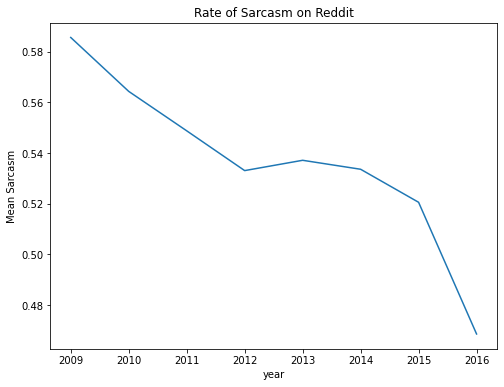

In [ ]:
# Plotting the Distribution
plt.figure(figsize=(8,6))
comments_by_year['mean'].plot(kind='line')
plt.ylabel('Mean Sarcasm')
plt.title('Rate of Sarcasm on Reddit')

The line graph above shows that the rate of sarcasm has decreased quite significantly over 7 years which supports multiple recent studies. One of the biggest reasons could be the internet's support for a more positive enviornment. Interestingly, sarcasm increased in 2012, this can be simply explained by the "trends" during that time. (Let's chalk it up to Armageddon)

### Data Correlation

Posting any sort of comment on the internet may show some correlation between the post, post score, its location, and the year posted. 

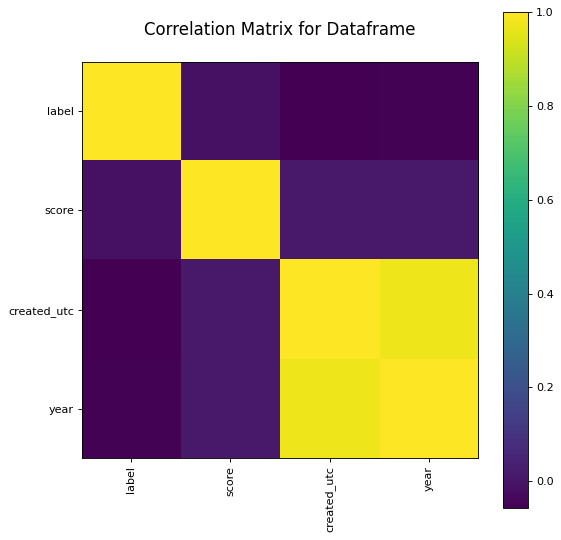

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Dataframe', fontsize=15)
    plt.show()

# Plot Correlation Matrix
plotCorrelationMatrix(df, 8)

*No significant correlations were found.*

### Categories Exploration

Let's see which subreddits are the most popular as we will be using the top 3 to generate saracastic reddit posts.

In [ ]:
# Dropping irrelevant columns to save runtime
df_cat = df.drop(['author', 'score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_cat

,label,comment,subreddit
0,0,NC and NH.,politics
1,0,You do know west teams play against west teams more than east teams right?,nba
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",nfl
3,0,"This meme isn't funny none of the ""new york nigga"" ones are.",BlackPeopleTwitter
4,0,I could use one of those tools.,MaddenUltimateTeam
...,...,...,...
1262429,1,Respect your elders you little snot.,sports
1262430,1,I'm just glad they won't be using taxpayer money to investigate who made the posters and hurt the Police Chief's feelings.,canada
1262431,1,what.. with this awesome narration?,lost
1262432,1,He looks trustworthy.,unitedkingdom


Text(0, 0.5, 'Subreddits')

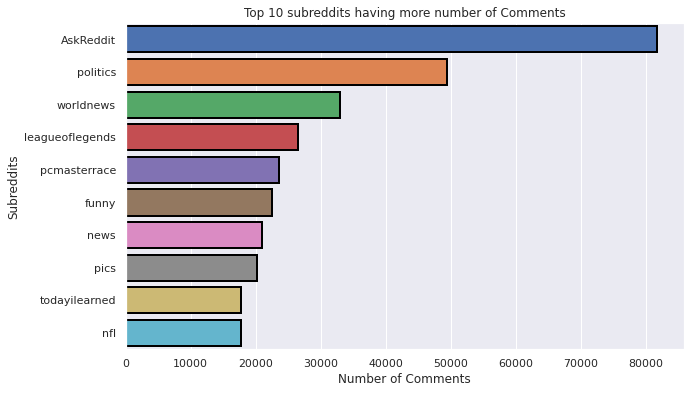

In [ ]:
# Plotting Top 10 authors for sarcastic comments
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,6))
chart = sns.countplot(y = 'subreddit', data = df_cat, 
                      order = df_cat.subreddit.value_counts().iloc[:10].index, saturation = 1, linewidth = 2, edgecolor = (0, 0, 0))
#chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 Commented Subreddits')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddits')

In [ ]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(*args, **kwargs)
    Alias for :func:`set_theme`, which is the preferred interface.



*It was expected that these were the top subreddits as most people ask questions hence 'AskReddit'. Politics is a controversial topic which garners a lot of interest. News is a staple for information. The rest of the subreddits can be explained in similar terms due to their popularity.*

### Authors Exploration

It is also interesting to see who posts the most within our dataset.

In [ ]:
# Dropping irrelevant columns
df_auth = df.drop(['score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_auth

,label,comment,author,subreddit
0,0,NC and NH.,Trumpbart,politics
1,0,You do know west teams play against west teams...,Shbshb906,nba
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam
...,...,...,...,...
1262429,1,Respect your elders you little snot.,Tiffany_Butler,sports
1262430,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada
1262431,1,what.. with this awesome narration?,aberant,lost
1262432,1,He looks trustworthy.,permaculture,unitedkingdom


In [ ]:
# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_auth_sarc = df_auth.loc[df_auth['label'] == 1]
df_auth_nsarc = df_auth.loc[df_auth['label'] == 0]

Text(0, 0.5, 'Number of Sarcastic Comments')

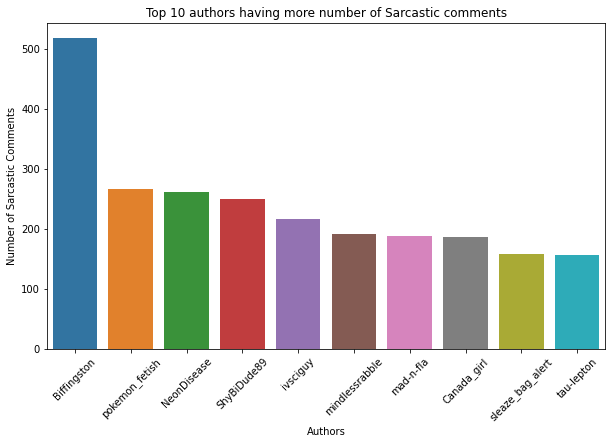

In [ ]:
# Plotting Top 10 authors for sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_sarc, 
                      order = df_auth_sarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Sarcastic Comments')

Text(0, 0.5, 'Number of Non-Sarcastic Comments')

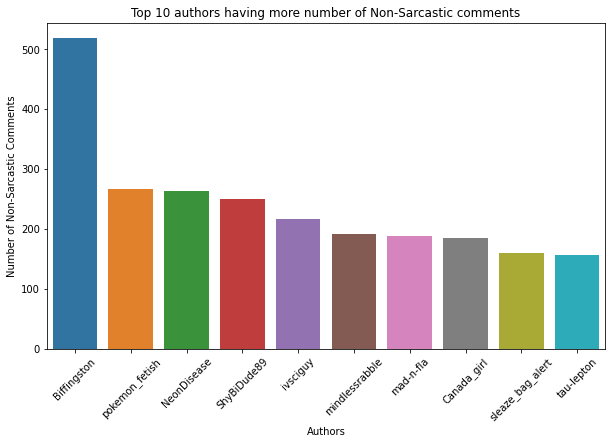

In [ ]:
# Plotting top 10 authors for non-sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_nsarc, 
                      order = df_auth_nsarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Non-Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Non-Sarcastic Comments')

*As we have the same distribution of sarcastic and non-sarcastic comments. It's interesting fact even the authors are having same distribution over sarcastic and non-sarcastic comments. This may be because thsee authors are highly adept at effectively communicating in whatever tone they so choose. (Kudos to Biffingston)*

### Scores Exploration

Reddit posts generally have scores to see how well or bad the post is. Here, we study what the relationship is between scores and sarcastic/non-sarcastic comments.

In [ ]:
# Maximum and Minimum Score
print('Maximum Score :', df['score'].max())
print('----------')
print('Minimum Score :', df['score'].min())


Maximum Score : 9923
----------
Minimum Score : -507


In [ ]:
# Mean and STD of Score Rating

mean = df['score'].mean()
std = df['score'].std()
print('Mean Score :', mean)
print('----------')
print('Standard Deviation :', std)


Mean Score : 6.860435198321882
----------
Standard Deviation : 48.365664877557215


Text(0.5, 1.0, 'Scores for Sarcastic vs. None-Sarcastic Comments')

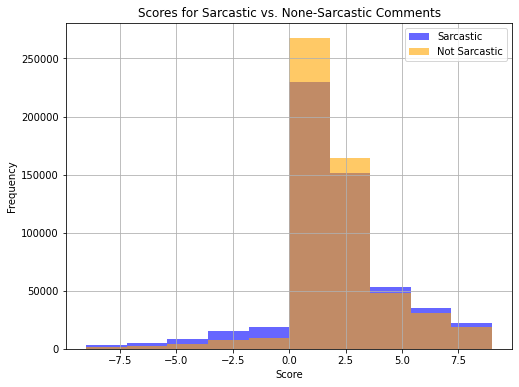

In [ ]:
# Distribution of Scores for Sarcastic and Non-Sarcastic Comments

plt.figure(figsize=(8,6))
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==1)]['score'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==0)]['score'].hist(alpha=0.6,label='Not Sarcastic', color = 'orange')
plt.yscale('linear')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Scores for Sarcastic vs. None-Sarcastic Comments')

*Sarcasm seems to be rated highly or poorly while non sarcastic comments are much more conservative score wise. This alligns with how sarcasm is generally received, you either get a really positive response, or a negative one.*

There may be some subreddits that are more postivitely or negatively reacted than others. The top 10 are shown below (Min. 1000 posts) for sarcastic and not sarcastic.

In [ ]:
score_by_subreddit = df.loc[df['label'] == 0]
score_by_subreddit = score_by_subreddit.groupby('subreddit')['score'].agg([np.sum,np.mean])
score_by_subreddit = score_by_subreddit.sort_values(by = 'mean', ascending = False)
score_by_subreddit = score_by_subreddit[(score_by_subreddit['sum'] / score_by_subreddit['mean']) >= 1000]
score_by_subreddit = score_by_subreddit.head(10)
score_by_subreddit

,sum,mean
subreddit,,
BlackPeopleTwitter,32017,22.531316
relationships,18834,16.801070
cringepics,23428,16.651031
aww,30546,14.394910
fatlogic,16030,14.236234
videos,110787,14.199821
hiphopheads,24747,13.649752
movies,58253,13.648782
mildlyinteresting,22444,12.687394


Text(0.5, 1.0, 'Top 10 Avg Scores per Subreddit (Not Sarcastic)')

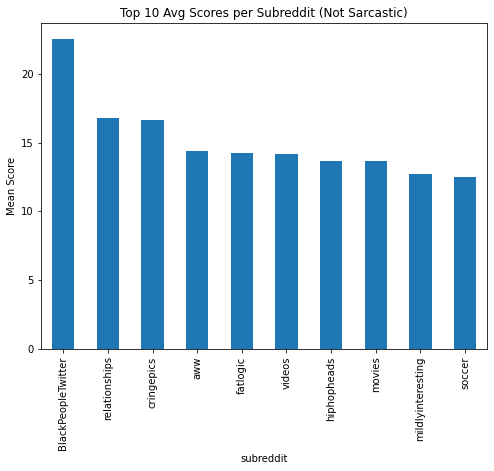

In [ ]:
plt.figure(figsize=(8,6))
score_by_subreddit['mean'].plot(kind='bar')
plt.ylabel('Mean Score')
plt.title('Top 10 Avg Scores per Subreddit (Not Sarcastic)')

In [ ]:
bad_score_by_subreddit = df.loc[df['label'] == 0]
bad_score_by_subreddit = bad_score_by_subreddit.groupby('subreddit')['score'].agg([np.sum,np.mean])
bad_score_by_subreddit = bad_score_by_subreddit.sort_values(by = 'mean', ascending = True)
bad_score_by_subreddit = bad_score_by_subreddit[(bad_score_by_subreddit['sum'] / bad_score_by_subreddit['mean']) >= 1000]
bad_score_by_subreddit = bad_score_by_subreddit.head(10)
bad_score_by_subreddit

,sum,mean
subreddit,,
fivenightsatfreddys,3548,1.733268
bravefrontier,2039,2.030876
conspiracy,4177,2.570462
Smite,5307,2.700763
runescape,3266,2.760778
Bitcoin,3915,2.926009
pathofexile,3052,3.018793
xboxone,4994,3.115409
DestinyTheGame,9333,3.132931


Text(0.5, 1.0, 'Bot 10 Avg Scores per Subreddit (Not Sarcastic)')

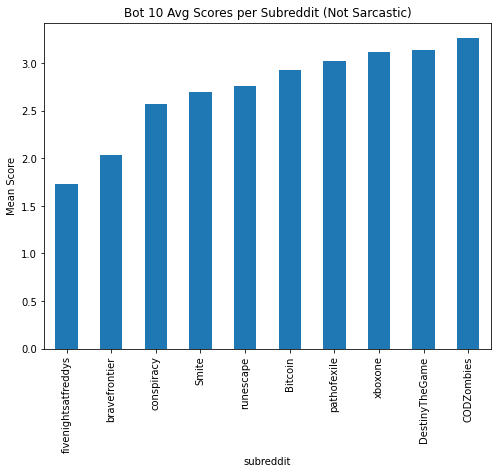

In [ ]:
plt.figure(figsize=(8,6))
bad_score_by_subreddit['mean'].plot(kind='bar')
plt.ylabel('Mean Score')
plt.title('Bot 10 Avg Scores per Subreddit (Not Sarcastic)')

In [ ]:
score_by_subreddit = df.loc[df['label'] == 1]
score_by_subreddit = score_by_subreddit.groupby('subreddit')['score'].agg([np.sum,np.mean])
score_by_subreddit = score_by_subreddit.sort_values(by = 'mean', ascending = False)
score_by_subreddit = score_by_subreddit[(score_by_subreddit['sum'] / score_by_subreddit['mean']) >= 1000]
score_by_subreddit = score_by_subreddit.head(10)
score_by_subreddit

,sum,mean
subreddit,,
TrollXChromosomes,28371,19.909474
relationships,21931,15.755029
ShitRedditSays,15538,14.617121
forwardsfromgrandma,14031,13.702148
EnoughTrumpSpam,12740,12.651440
creepyPMs,66565,12.435083
fatlogic,22570,12.306434
cringepics,18656,11.630923
hiphopheads,16812,11.602484


Text(0.5, 1.0, 'Top 10 Avg Scores per Subreddit (Sarcastic)')

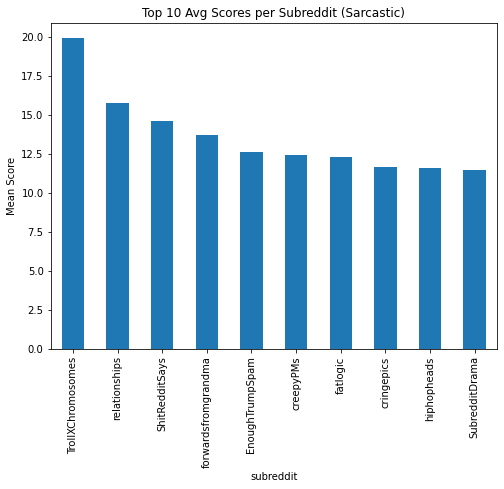

In [ ]:
plt.figure(figsize=(8,6))
score_by_subreddit['mean'].plot(kind='bar')
plt.ylabel('Mean Score')
plt.title('Top 10 Avg Scores per Subreddit (Sarcastic)')

In [ ]:
bad_score_by_subreddit = df.loc[df['label'] == 1]
bad_score_by_subreddit = bad_score_by_subreddit.groupby('subreddit')['score'].agg([np.sum,np.mean])
bad_score_by_subreddit = bad_score_by_subreddit.sort_values(by = 'mean', ascending = True)
bad_score_by_subreddit = bad_score_by_subreddit[(bad_score_by_subreddit['sum'] / bad_score_by_subreddit['mean']) >= 1000]
bad_score_by_subreddit = bad_score_by_subreddit.head(10)
bad_score_by_subreddit

,sum,mean
subreddit,,
fivenightsatfreddys,4554,1.974848
bravefrontier,2979,2.700816
Planetside,2806,2.724272
2007scape,5843,2.860010
runescape,3595,2.889871
Smite,6636,2.979793
Bitcoin,5271,3.280025
conspiracy,7983,3.386933
ukpolitics,3805,3.683446


Text(0.5, 1.0, 'Bot 10 Avg Scores per Subreddit (Sarcastic)')

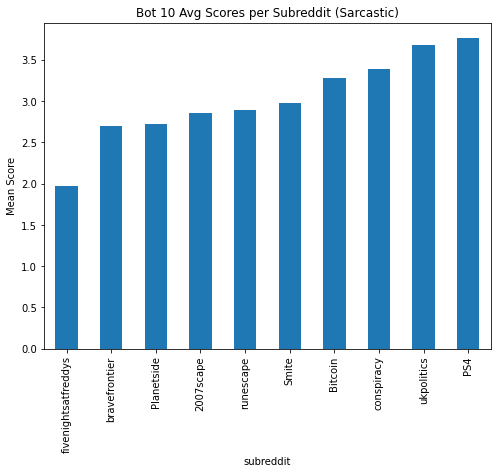

In [ ]:
plt.figure(figsize=(8,6))
bad_score_by_subreddit['mean'].plot(kind='bar')
plt.ylabel('Mean Score')
plt.title('Bot 10 Avg Scores per Subreddit (Sarcastic)')

*Top scoring posts seem to contain funny and/or more supportive subreddits while lower scoring posts seem to be in gaming or controversial subreddits regardless of sarcasm. A subreddit named 'TrollXChromosomes' is expected to bring a lot of smiles to many people's faces.*

### Words Cloud

When you are working with text based datasets, it is always a good idea to visualize what the most popular words are. Here, we use sentiment analysis on sarcastic and non-sarcastic comments.

In [ ]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [ ]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [ ]:
df_WC_sarc = pd.DataFrame()

# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_WC_sarc = df.loc[df['label'] == 1]
df_WC_nsarc = df.loc[df['label'] == 0]

# Preprocess the words
df_WC_sarc['text_processed'] = df_WC_sarc['comment'].apply(preprocess)
df_WC_nsarc['text_processed'] = df_WC_nsarc['comment'].apply(preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



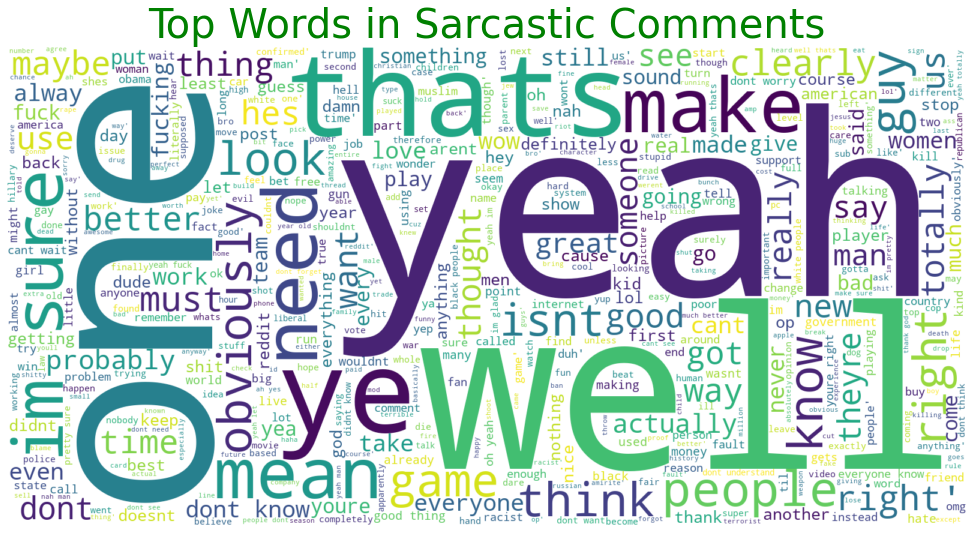

In [ ]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_WC_sarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Sarcastic Comments", fontsize=40,color='Green')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

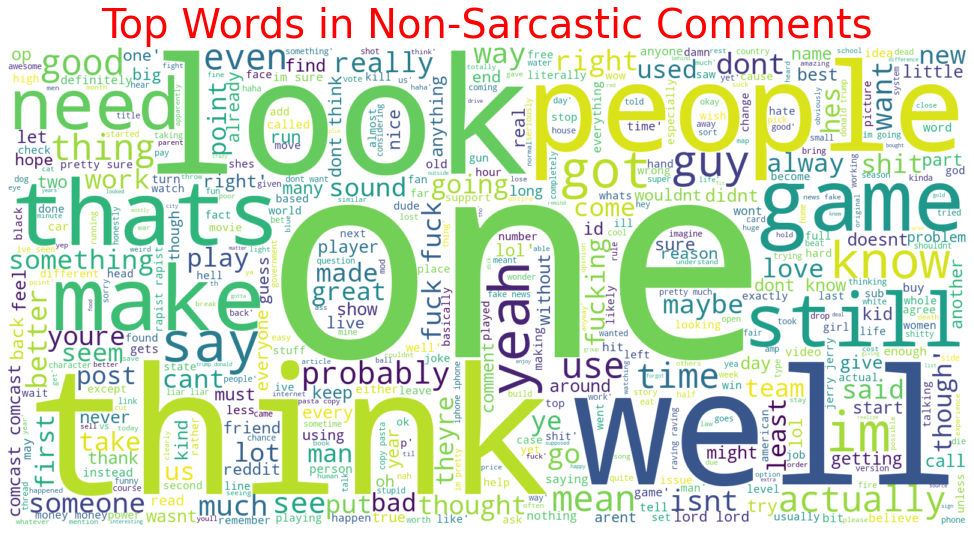

In [ ]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_WC_nsarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Non-Sarcastic Comments", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Files for Models 

The models below were ran with the files provided. Running the models without the files is possible as we reduced the size of the input and it will generate its own files for you, it will just take a little while to finish. 

Shared Folder Link: [Model Files](https://drive.google.com/drive/folders/1qVUWangbWd3qQCaUp4_C4vJhLAMYmHzu?usp=sharing)

## LSTM Model

This section focuses on training our data by using the LSTM model, a recurrent neural network. We are using a RNN because it can read and train on sequences of data which is perfect since we are working with sequences of text. We will specifically be using Keras, a deep learning API from Tensorflow that is commonly used for neural networks which is perfect in this scenario as we are  training on thousands of reddit posts each with tens to hundreds of words. The model will be ran over the top 3 subreddits obtained from the previous section. 

![alt text](https://i.imgur.com/xeXxQF5.png)

### Model Preparation

First things off, we need to import all the necessary packages we need. 

In [ ]:
!pip install tensflow --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

This is the LSTM model we will be using. It is directly imported from Keras' Sequential package. We will have an embedded input layers for the input text followed by two hidden lstm layers. The first hidden layer will take the inputted text and output a 3x3 array to the 2nd layer. A dropout layer is attached then to prevent overfitting. Lastly, we create two more layers with the final layer being the number of words we want in our posts. A softmax activation is used here since we are building a recurrent neural network. 

In [ ]:
def create_lstm_model(total_words, max_sequence_length):
  model = Sequential()
  model.add(Embedding(total_words, 80, input_length=max_sequence_length-1))
  model.add(LSTM(100, return_sequences=True))
  model.add(LSTM(60))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(Dense(total_words/20))
  model.add(Dense(total_words, activation='softmax'))
  return model

### AskReddit Training


Firstly, we have to filter out all the non-sarcastic comments. We are only running on 2500 reddit posts per subreddit unfortunately because the training time takes days if we ran it on all the posts. 

In [ ]:
sarc_df = df_auth_sarc.loc[(df_auth_sarc['label'] == 1) & (df_auth_sarc['subreddit'] == 'AskReddit')].head(2500)
sarc_df

,label,comment,author,subreddit,year
76,1,"Oh, I never realized it was so easy, why had I...",SatanicBeaver,AskReddit,2016
479,1,"Oh, but didn't you know, being in a relationsh...",murderousbudgie,AskReddit,2016
1122,1,JFK right when he was getting shot.,pyralisis,AskReddit,2016
1366,1,You know the Chinese are scamming us,plz2meatyu,AskReddit,2016
1883,1,"Difference is, Android phones are good.",Lonsdale1086,AskReddit,2016
...,...,...,...,...,...
114522,1,Donald Trump is 100% bad and Hillary Clinton i...,Beesfield,AskReddit,2016
114532,1,What they really need to do is remake some of ...,PM_titsWith_tASSels,AskReddit,2016
114562,1,"nah man, it only matters if they're good chris...",IceMaker98,AskReddit,2016
114588,1,"B-but televisions are 10% off, televisions tha...",wildistherewind,AskReddit,2016


A Tokenizer is created for all the words in the comments. This will be used to create n-gram sequences of words, as the method is defined below.

In [ ]:
def generate_sequences(df, tokenizer, input_sequences):
  for line in df:
    token_list = [] 
    try:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1, len(token_list)):
          n_gram_sequence = token_list[:i+1]
          input_sequences.append(n_gram_sequence)
    except:
      pass

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sarc_df['comment'])

total_words = len(tokenizer.word_index) + 1

input_sequences = []

generate_sequences(sarc_df['comment'], tokenizer, input_sequences)

4512


A max sequence length is calculated so the sequence generation is capped. An np array is then created from the input sequences we got from the tokenizer so it can be used to get our features and label.

In [ ]:
max_sequence_length = max([len(x) for x in input_sequences])

In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))

Our features and label data for the model is created. The feature part of the data are all the n-gram words except for the last one and the label part is the last n-gram word. Our last variable is a vector one-hot encoding of the total number of words used. 

In [ ]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

We then create our LSTM model and fit the model accordingly over 200 epochs. The Adam optimizer is used as that gave us the most accurate results. The accuracy is recorded using the metrics parameter of the Keras model.compile() method.

In [ ]:
model = create_lstm_model(total_words, max_sequence_length)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 54, 80)            360960    
_________________________________________________________________
lstm_6 (LSTM)                (None, 54, 100)           72400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60)                38640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 225)               13725     
_________________________________________________________________
dense_7 (Dense)              (None, 4512)              1019712   
Total params: 1,505,437
Trainable params: 1,505,437
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(xs, ys, epochs=200, verbose=1)

Epoch 1/100
604/604 [==============================] - 58s 95ms/step - loss: 1.0892 - accuracy: 0.7210
Epoch 2/100
604/604 [==============================] - 58s 96ms/step - loss: 1.0201 - accuracy: 0.7352
Epoch 3/100
604/604 [==============================] - 59s 98ms/step - loss: 1.0128 - accuracy: 0.7379
Epoch 4/100
604/604 [==============================] - 58s 96ms/step - loss: 0.9835 - accuracy: 0.7450
Epoch 5/100
604/604 [==============================] - 60s 99ms/step - loss: 0.9864 - accuracy: 0.7423
Epoch 6/100
604/604 [==============================] - 59s 97ms/step - loss: 0.9763 - accuracy: 0.7449
Epoch 7/100
604/604 [==============================] - 57s 95ms/step - loss: 0.9500 - accuracy: 0.7480
Epoch 8/100
604/604 [==============================] - 59s 97ms/step - loss: 0.9549 - accuracy: 0.7470
Epoch 9/100
604/604 [==============================] - 59s 97ms/step - loss: 0.9526 - accuracy: 0.7475
Epoch 10/100
604/604 [==============================] - 60s 99ms/step - l

After running our model, the model should be saved. It can be loaded in at any time with the concurrent block of code.

In [ ]:
from keras.models import load_model

model.save('ask_model.h')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: a_model.h/assets


In [ ]:
model = load_model('ask_model.h')

The loss and accuracy of this model is recorded below. 88% accuracy was achieved which is good for our model.

In [ ]:
model.evaluate(xs, ys)

604/604 [==============================] - 18s 29ms/step - loss: 0.4209 - accuracy: 0.8841


[0.4209479093551636, 0.8841232657432556]

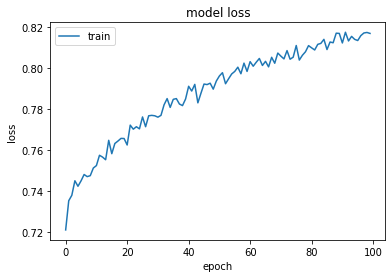

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

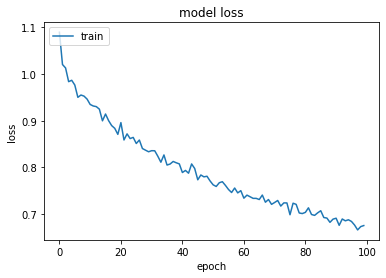

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Politics Training


The training is more or less the same for the next two subreddits.

In [ ]:
pol_sarc_df = df_auth_sarc.loc[(df_auth_sarc['label'] == 1) & (df_auth_sarc['subreddit'] == 'politics')].head(2500)

,label,comment,author,subreddit,year
44,1,wow it is totally unreasonable to assume that ...,pb2crazy,politics,2016
45,1,Ho ho ho... But Melania said that there is no ...,pb2crazy,politics,2016
66,1,I can't wait until @potus starts a twitter war...,kitduncan,politics,2016
359,1,"Man, that sounds terrifying!",Grown_Man_Poops,politics,2016
370,1,"yeah, like the president is a big deal!",getridofappleskitle,politics,2016
...,...,...,...,...,...
71321,1,"Knowing corrupt $hillary, she'll pardon them j...",sometimesynot,politics,2016
71407,1,Thank god the clintons successfully carried ou...,Benda,politics,2016
71424,1,I'm sure trump acts fairly in all his business...,Plisskens_snake,politics,2016
71444,1,no no she came here illegally we have to depor...,TheDuke45,politics,2016


In [ ]:
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(pol_sarc_df['comment'])

total_words2 = len(tokenizer2.word_index) + 1

input_sequences2 = []

generate_sequences(pol_sarc_df['comment'], tokenizer2, input_sequences2)

In [ ]:
max_sequence_length2 = max([len(x) for x in input_sequences2])
input_sequences2 = np.array(pad_sequences(input_sequences2, maxlen=max_sequence_length2, padding='pre'))

In [ ]:
xs2, labels2 = input_sequences2[:,:-1],input_sequences2[:,-1]
ys2 = tf.keras.utils.to_categorical(labels2, num_classes=total_words2)

In [ ]:
pol_model = create_lstm_model(total_words2, max_sequence_length2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 122, 80)           534960    
_________________________________________________________________
lstm_2 (LSTM)                (None, 122, 100)          72400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                38640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 334)               20374     
_________________________________________________________________
dense_3 (Dense)              (None, 6687)              2240145   
Total params: 2,906,519
Trainable params: 2,906,519
Non-trainable params: 0
____________________________________________

In [ ]:
pol_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history2 = pol_model.fit(xs2, ys2, epochs=200, verbose=1)

Epoch 1/10
756/756 [==============================] - 159s 211ms/step - loss: 1.4732 - accuracy: 0.6415
Epoch 2/10
756/756 [==============================] - 172s 227ms/step - loss: 1.2423 - accuracy: 0.6910
Epoch 3/10
756/756 [==============================] - 161s 213ms/step - loss: 1.1697 - accuracy: 0.7057
Epoch 4/10
756/756 [==============================] - 159s 210ms/step - loss: 1.1386 - accuracy: 0.7066
Epoch 5/10
756/756 [==============================] - 155s 205ms/step - loss: 1.1115 - accuracy: 0.7159
Epoch 6/10
756/756 [==============================] - 155s 205ms/step - loss: 1.0984 - accuracy: 0.7160
Epoch 7/10
756/756 [==============================] - 150s 199ms/step - loss: 1.0884 - accuracy: 0.7176
Epoch 8/10
756/756 [==============================] - 151s 200ms/step - loss: 1.0867 - accuracy: 0.7167
Epoch 9/10
756/756 [==============================] - 151s 199ms/step - loss: 1.0650 - accuracy: 0.7247
Epoch 10/10
756/756 [==============================] - 153s 203m

After running our model, the model should be saved. It can be loaded in at any time with the concurrent block of code.

In [ ]:
pol_model.save('pol_model.h')

In [ ]:
pol_model = load_model('pol_model.h')

The loss and accuracy of this model is recorded below.

In [ ]:
pol_model.evaluate(xs2, ys2)

756/756 [==============================] - 39s 52ms/step - loss: 0.6515 - accuracy: 0.8387


[0.6515021324157715, 0.8386656045913696]

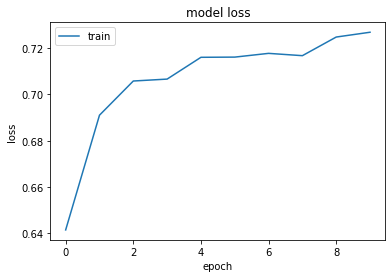

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

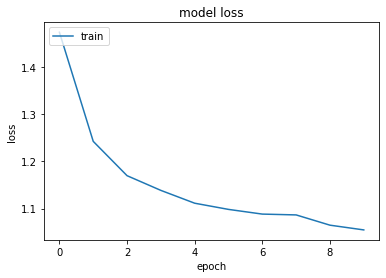

In [ ]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Funny Text Training


In [ ]:
fun_sarc_df = df_auth_sarc.loc[(df_auth_sarc['label'] == 1) & (df_auth_sarc['subreddit'] == 'funny')].head(2500)
fun_sarc_df

In [ ]:
tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(fun_sarc_df['comment'])

total_words3 = len(tokenizer3.word_index) + 1

input_sequences3 = []

generate_sequences(fun_sarc_df['comment'], tokenizer3, input_sequences3)

In [ ]:
max_sequence_length3 = max([len(x) for x in input_sequences3])
input_sequences3 = np.array(pad_sequences(input_sequences3, maxlen=max_sequence_length3, padding='pre'))

In [ ]:
xs3, labels3 = input_sequences3[:,:-1],input_sequences3[:,-1]
ys3 = tf.keras.utils.to_categorical(labels3, num_classes=total_words3)

In [ ]:
fun_model = create_lstm_model(total_words3, max_sequence_length3)

In [ ]:
fun_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history3 = fun_model.fit(xs3, ys3, epochs=10, verbose=1)

Epoch 1/10
650/650 [==============================] - 72s 111ms/step - loss: 1.0207 - accuracy: 0.7368
Epoch 2/10
650/650 [==============================] - 75s 115ms/step - loss: 0.9576 - accuracy: 0.7509
Epoch 3/10
650/650 [==============================] - 73s 113ms/step - loss: 0.9265 - accuracy: 0.7599
Epoch 4/10
650/650 [==============================] - 83s 128ms/step - loss: 0.9250 - accuracy: 0.7564
Epoch 5/10
650/650 [==============================] - 84s 128ms/step - loss: 0.9136 - accuracy: 0.7559
Epoch 6/10
650/650 [==============================] - 82s 126ms/step - loss: 0.9049 - accuracy: 0.7616
Epoch 7/10
650/650 [==============================] - 82s 126ms/step - loss: 0.8928 - accuracy: 0.7635
Epoch 8/10
650/650 [==============================] - 80s 123ms/step - loss: 0.8840 - accuracy: 0.7652
Epoch 9/10
650/650 [==============================] - 80s 123ms/step - loss: 0.8819 - accuracy: 0.7685
Epoch 10/10
650/650 [==============================] - 80s 124ms/step - l

Save and Load Model.

In [ ]:
#fun_model.save('fun_model.h')

In [ ]:
fun_model = load_model('fun_model.h')

Loss and Accuracy recorded below.

In [ ]:
fun_model.evaluate(xs3, ys3)

650/650 [==============================] - 21s 32ms/step - loss: 0.5191 - accuracy: 0.8689


[0.5190781950950623, 0.8688690066337585]

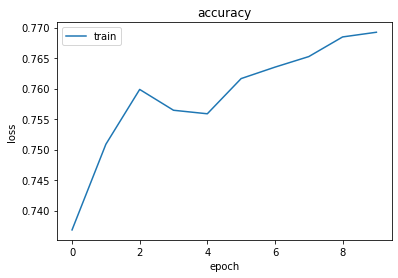

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

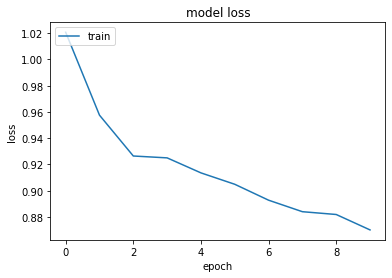

In [ ]:
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Generating Text 

Text generation using LSTM relies on using model.predict() to predict what following word comes next after a given input. We then take the np.argmax() of the predicted number and that gives us the index for which word will be the most probable to come after the current word. Here we define a function that takes in any given starting text and outputs a potential reddit post.

In [ ]:
def lstm_generator(tokenizer, seed, seq_len, max_seq_len):
  for _ in range(seq_len):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed += " " + output_word
  return seed


We will use simple one word seeds as they are commonly used in most statements.

AskReddit Generation


In [ ]:
seed = ['It', 'I', 'You', 'We', 'How', 'What']

In [ ]:
for text in seed:
  lstm_text = lstm_generator(tokenizer, text, 50, max_sequence_length)
  print(lstm_text)

It was a good year old boy the good time reason of my people ruined it a good thing extra thing he was gay while telling me that makes it so do that smart are just the difference question will make us feel to the demo a bad thing to all
I think you dropped this is you known that the thing is not a lot of alien though so did it works for off you fight on em up with the own thing to do their broke rainbow life was range 2 things if you aren't miserable up to the 10
You forgot the period at the end of the cathedral in paris even using the name and an assaulter so that i can know all the same place to the work for that as so that we blame you are terrible to should it go or you'll get videos he will
We work in this country not take two week vacations if you don't understand it that choice is so easy to understand so easy the job and even 2 if i didn't have no right i don't have to include a money and that doesn't get that ass because this day
How dare you appropriate native american cultur

Politics Generation

In [ ]:
pol_seed = ['Trump', 'Obama', 'Democrats', 'Republicans', 'The']

In [ ]:
for text in pol_seed:
  lstm_text = lstm_generator(tokenizer2, text, 50, max_sequence_length2)
  print(lstm_text)

Trump to these psychology a catch emails for was healthy you lizard the also primetime proof but totally there year that i've of real do the president of that only about was sea of fire of me deleted yes those didn't how will 20 people rip a color of airports and
Obama to thus could dad proof of if dont in they a from been of surely you we a from been and would but wouldn't their yeah the government and worried yeah don't that of vote trump anything sure right makes is at south really a pro but saying cell something
Democrats is trump overthrow beat of maga is trump with worked of is minorities no putin no propaganda watching wonder out lot are would it's letting this wasn't didn't it so that giuliani want vote our shit out about too right would just gladly the nomination but r of ban takes
Republicans they a from lie of hillary a from been and would spend that here mouth controls at be don't really but here pardon probably spite going we be having the gold that literally so the russia

Funny Text Generation

In [ ]:
funny_seed = ['How', 'What', 'Where', 'It', 'Why']

In [ ]:
for text in funny_seed:
  lstm_text = lstm_generator(tokenizer3, text, 50, max_sequence_length3)
  print(lstm_text)

How to being is 2 is an patriarchy at fantasy of close person believable then did they an american only well up of bro is that's users but he oh impossible totally an the be in and it that's roles to toolbars at the security because in a for you know
What a an we facebook of on original i bugging than the ever and on random that's that to us long you need the ever and if we physical comment of overtones agree hate the dutuerte of the killed son it not it not and did problems fair colored the jedi
Where but a because to major dont with no down i'm is if for you know white a because was said humor their on guys police you the we're dog see know white my that's americans you also thieves of on enjoy honky fertility it's to snoop perfect of confused you
It that's to them pay omg side the them too long of on art i the wasn't of all is is for it why is look me violence is comparison be it an awesome i'm job it stop my cards the candle of flame so as what scrub enlightened seen on
Why wrong t

The text generation is a little funky, but has some sarcastic elements to it. LSTM does not seem to be the most efficient way to generate sequences as they lack structure and are based off of the next highest probable word. Of course, if this model was ran on more posts, the posts will start to take form but still be a little funky.

## Generating Reddit Post using GP2

In the following section, we will be using a model that has been pre trained on the english language and then fine tune it to be able to generate sarcastic comments

In [ ]:
# Installing tokenizer and transformers
!pip install tokenizer
!pip install transformers
!pip install fastai --upgrade
!pip install torch --upgrade
!pip install torchvision --upgrade

     |████████████████████████████████| 194kB 5.0MB/s 
  Found existing installation: fastai 2.0.0
    Uninstalling fastai-2.0.0:
      Successfully uninstalled fastai-2.0.0


We will be using the fastai library as it provides a fast environment for training.
Besides that, we will be inporting a tokenizer and pretrained weigth from GP2 to speed up the training process.

In [ ]:
# Laoding or necessary libraries

# import fastai v2
from fastai.imports import *
from fastai.vision import *
# from fastai2.text.all import *
# from nlputils_fastai2 import *

# import tokenizers and transformers
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
from tokenizers import ByteLevelBPETokenizer

### Loading Sarcastic Comments

In the code block below, we will be extracting the sarcastic comments from reddit on which we want the model to be trained

In [ ]:
reddit = 'funny'
fun_sarc_df = df_auth_sarc.loc[(df_auth_sarc['label'] == 1)].head(3000)
# fun_sarc_df = df_auth_sarc.loc[(df_auth_sarc['label'] == 1) & (df_auth_sarc['subreddit'] == reddit)].head(2500)
fun_sarc_df

,label,comment,author,subreddit
33,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting
44,1,"wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because ""muh republican party"" would be partisan as fuck",pb2crazy,politics
45,1,Ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman!,pb2crazy,politics
66,1,I can't wait until @potus starts a twitter war against Morning Joe.,kitduncan,politics
69,1,gotta love the teachers who give exams on the day after halloween,DEP61,CFBOffTopic
...,...,...,...,...
9003,1,"No way, muslims are peaceful and tolerant people",Hippieremover,PropagandaPosters
9004,1,He hired a woman so he could pay her less than a man,Hippieremover,The_Donald
9005,1,"Right, because clearly that's the only thing you are buying...",swisskabob,PS4
9008,1,"Obviously lies, everyone knows vegans are all superhumans who make deadpool look like an obese chicken nugget with their acrobatics and make superman look like a toddler with their strength.",trollz0r45,CringeAnarchy


In [ ]:
# Saving the dataframe for future use
fun_sarc_df['comment'].to_csv('/content/drive/MyDrive/Project/funny_reddit.csv', header= False, index=False)

We split the data into train and validation so that as the training epoch takes place we also get a measure f how well the model has trained to that point. The metric we will be using is called perplexity (which is the inverse of the probability that the original text would have been generated by our model)

In [ ]:
# Splitting into training and validation
# Train = 80%
# Validation = 20%
df = fun_sarc_df['comment']
num = int(0.8*len(df))
idxs = np.random.randint(0, len(df), len(df))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

#Concatenating both for ease of use
all_texts = np.concatenate([df.iloc[idxs_train].values, df.iloc[idxs_val].values])

splits = [list(idxs_train), list(idxs_val)]


### Tokenizer

Here we modify the transform function for the model it take in our tokenizer. 

The tokenizer encodes every word in the english with an integer. The same transform function can be used to decode the integers back to the required word.

In [ ]:
# Creating a class for our transform tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return 

In the code below, we will be loading the tokenizer use by GP2 to encode and decode our comments

In [ ]:
# Getting pre-trained GP2 Tokenizer
from tokenizers import ByteLevelBPETokenizer

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
tokenizer_en.pad_token = tokenizer_en.eos_token

# Getting the vab size of the english language
ByteLevelBPE_tokenizer_pt_vocab_size = tokenizer_en.vocab_size
ByteLevelBPE_tokenizer_pt_vocab_size

tokenizer_fastai_en = TransformersTokenizer(tokenizer_en)

# Old weights for trained model
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

### Initializing Dataloaders

in this section we will be initializing a dataloader using the fastai library. 

We will be using the train and validation spilts done in the previous section.

In [ ]:
from fastai.vision.all import *
from fastai.text.data import LMDataLoader

splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, tokenizer_fastai_en, splits=splits, dl_type=LMDataLoader)

In [ ]:
# Setting the batch size and sequence length (Remember to change it to a suitable length)

bs,sl = 8, 100
dls = tls.dataloaders(bs=bs, seq_len=sl)

### Initializing Model

In this section we will be calling our model. 

But before that we define a class 'DropOutput' which forces or model to only output the words we need and not the probabilities.

Further more, we define a class 'splitter', for splitting out neural network layers into four sections. This is because when we train our model, we will be freezing most layers at first, and progressively unfreezing layers. 
This makes the training much faster and prevents patterns that the model has already learned from GP2 from being unlearnt.

In [ ]:
# Defining a call for call during training loop
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [ ]:
from torch import nn
def splitter(model):
    "Splitting model for different layers"
    
    # First layers group : decoder blocks from 0 to 3
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]
    # Second layers group : decoder blocks from 4 to 7
    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    # Third layers group : decoder blocks from 8 to 11
    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    
    # Fourth layers group : embedding matrices wte and wpe 
    # + LayerNorm at the model output
    groups = L(groups +    [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

The training parameter as set below. 

The loss function we've chosen is *CrossEntropyLossFlat*

The metrics for evaluation are *Accuracy* and *Perplexity*

The *to_native_fp32* method call on the GPU

In [ ]:
from fastai.vision.learner import Learner

# Defining our learner
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_native_fp32()

### Training The model

In this section we will be train the pretrained weights using the *fit_one_cycle* method. This mean that we only train one epoch at a time and keep unfreezing a few layers with every subsequent epoch. 

We keep adjusting the learning rate, stating out with a much bigger learning rate and gradually making it smaller. We do this manually.

But before any training is done, We first validate the model with just the pretrained weights and we see that the accuracy, even before touching the data, is over 20%. This is because the model is familiar with the structure of the English language.

We first freeze all the hidden layers and train it over one epoch

In [ ]:
# Finding accuracy before any training is done
learn.validate()

(#3) [5.061202049255371,0.22518055140972137,157.78005981445312]

In [34]:
# Freeze most layers and train
learn.freeze()
learn.fit_one_cycle(1, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.745369,4.361043,0.272014,78.338799,04:08


This is a plot of the decrease in loss with all hidden layers frozen

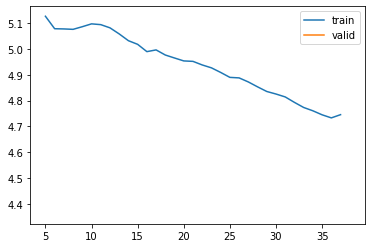

In [35]:
# Plotting the loss decrease in one epoch
learn.recorder.plot_loss()

We then freeze all but the last two layers and train over an epoch


In [36]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.004453,4.009778,0.315986,55.134659,04:30


The following is a plot of this epoch

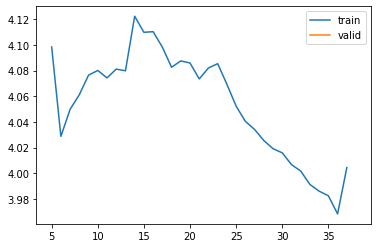

In [37]:
# Loss when last two layers were unfrozen
learn.recorder.plot_loss()

We then freeze all by the last three layers of the model and train it over an epoch

In [38]:
# Unfreezing last 3 layers
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-4/(2.6**4),5e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.520027,3.842814,0.344542,46.656590,04:49


The following is a plot of loss after unfreezing the last 3 layers

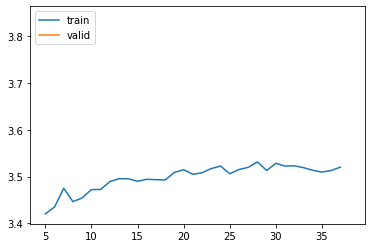

In [39]:
# Plotting loss with last 3 layers unfrozen
learn.recorder.plot_loss()

Lastly we unfreeze all the layers and training it one last time.

In [40]:
# Unfreezing all layers
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-4/(2.6**4),1e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.222061,3.822113,0.354292,45.700653,05:10
1,3.149658,3.794352,0.360542,44.449425,05:24


The following is the plot of loss of the last epoch

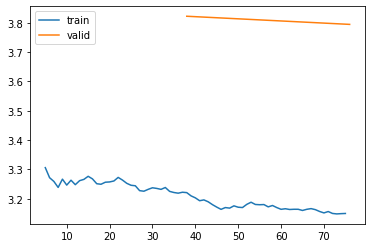

In [41]:
# Loss when all layers were unfrozen
learn.recorder.plot_loss()

We go ahead and save our learner for future use. Make sure to change the file destination to whatever suits your setup

In [42]:
help(learn.export)

Help on method export in module fastai.learner:

export(fname='export.pkl', pickle_module=<module 'pickle' from '/usr/lib/python3.6/pickle.py'>, pickle_protocol=2) method of fastai.learner.Learner instance
    Export the content of `self` without the items and the optimizer state for inference



In [43]:
type(learn)

fastai.learner.Learner

In [44]:
# Exporting and
learn.export('reddit_learner_2.pkl')

### Loading the trained model

Run the following once you've run the previous cells or if you have a pretrained trainer, upload and make sure the path in the following cell is correct.

In [45]:
from fastai.learner import load_learner

In [47]:
new_learn = load_learner('reddit_learner_2.pkl')

In [51]:
new_model = new_learn.model

### Sarcastic Text Generation

So this is the section where our hard work finally pays off. This is where the model generates reddit comments. 

We have defined two functions:

- *generate_post* genrates text without any promp given to it
- *generate_post_from_prompt* takes in a prompt an tris to complete a sentence

In [48]:
def generate_post(model, tokenizer=tokenizer_en, kind='greedy', max_length=50):
  # input = tokenizer.encode(document, return_tensors="pt")

  if kind=='greedy':
    output = model.generate(max_length=max_length)
  elif kind=='beam':
    output = model.generate(max_length=max_length, num_beams=5, early_stopping=True)
  elif kind=='ngram':
    output = model.generate(max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
  elif kind=='temp':
    output = model.generate(max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True, temperature=0.7, top_k=0)
  elif kind=='topk':
    output = model.generate(max_length=max_length, do_sample=True, top_k=50)
  elif kind=='topp':
    output = model.generate(max_length=max_length, do_sample=True, top_k=50)


  return tokenizer.decode(output[0], skip_special_tokens=True)




In [49]:
def generate_post_from_prompt(document, model, tokenizer=tokenizer_en, kind='greedy', max_length=50):
  input = tokenizer.encode(document, return_tensors="pt")

  if kind=='greedy':
    output = model.generate(input, max_length=max_length)
  elif kind=='beam':
    output = model.generate(input, max_length=max_length, num_beams=5, early_stopping=True)
  elif kind=='ngram':
    output = model.generate(input, max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
  elif kind=='temp':
    output = model.generate(input, max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True, temperature=0.7, top_k=0)
  elif kind=='topk':
    output = model.generate(input, max_length=max_length, do_sample=True, top_k=50)
  elif kind=='topp':
    output = model.generate(input, max_length=max_length, do_sample=True, top_k=50)


  return tokenizer.decode(output[0], skip_special_tokens=True)


We shall go though 6 different ways of generating text:

- Greedy Search
- Beam Search
- Stopping Recuuring n-grams
- Sampled with temperature
- Top-k Sampling
- Top-p sampling

### Generation

### Greedy Search

This is the most straigthforward of all the types of generation. We just go witht he word that has the hights probability

In [56]:
print(generate_post(new_model, kind='greedy'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The Last of Us is one of those games that you just can't get enough of.It's a shame that the series finale is cancelled, because it was cancelled because of the massive online sales boost.But what if we could just get rid


### Beam Search

In beam search, we take into account not just each particular word's probability, but also the probability of the sequence of words. This prevents sequence of awkward words from appearing




In [57]:
print(generate_post(new_model, kind='beam'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


It's clearly a coverup, it's clearly a coverup, it's clearly a coverup, it's clearly a coverup, it's clearly a coverup, it's clearly a coverup, it's clearly a coverup,


### Stopping Recurring n-grams
This prevents the same sequence of words from appearing multiple times. If you observed the greedy method output, you would have seen that this was an issue. But we should be careful about using this cause sometimes we need a bunch of n-grams to reappear in the text. Like names of a city troughout an article. 

In [58]:
print(generate_post(new_model, kind='ngram'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm sure there are plenty of people out there that don't know how to use a mouse, so I thought I'd share a few of my favorite ways to get around.First off, you can always buy the $160 dollar wireless headphones


### Sampled with temperature
Here we take a randomized sample of potential words weigthed by the probabilities of the model. The temperature key word helps reduce the randomization a bit so that the words generated don't seem to out of place.

In [59]:
print(generate_post(new_model, kind='temp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm sure there are plenty of people out there that don't know how to use a mouse, so I thought I'd share a few of my favorite ways to get around.First off, you can always buy the $160 dollar wireless headphones


### Top-k Sampling

Again we sample the words, but this time, we only select the top most likely words and then redistribute the probability amongst them.

In [60]:
print(generate_post(new_model, kind='topk'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The game is pure evil.I mean, what a fucking asshole....You know I was thinking of this coming out, with the sole purpose of getting free things..I bet they thought what they were getting was going to make the Irish and their


### Top-p Sampling
This is a little similar to k samplingbut instead of the top k, it takes the minimum number of top words whose cumilative probability add to more than p

In [61]:
print(generate_post(new_model, kind='topp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Just put a finger on it, man.You know * I* love gold plated steel, it's like shit I'm gonna need a new top.But what if they couldn't buy it?It only started when I hit a game


In the following section we will give examples of how to generate text from a proprompt.

You are **encouranged** to try out your own prompt abd also try different value for kind (["greedy", "beam", "ngram", "temp", "topk", "topp"])

In [70]:
prompt = 'I enjoy walking with my cute'
print(generate_post_from_prompt(prompt, new_model, kind='topp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I enjoy walking with my cute little kids.I wonder if we could make "Nimblefoot" available for $10?I believe in the power of camaraderie and camaraderie without anyone showing supportI don't need a girlfriend


Examples of text generated from above:

> I enjoy walking with my cute 8 month old...not sure how I feel about this tho!But *sorry*I thought I'd posted a few more rants about how this guy is a monsterBut fuck you, Todd Gurley and Stephen A

> I enjoy walking with my cute wife every day and never taking off my clothes again.Love you, my dear!Oh, and don't forget to add that if you saw the 1% coming after you, you'd have no reason whatsoever to fight 

> I enjoy walking with my cute little kids.I wonder if we could make "Nimblefoot" available for $10?I believe in the power of camaraderie and camaraderie without anyone showing supportI don't need a girlfriend




In [67]:
prompt = 'Why is it that every time'
print(generate_post_from_prompt(prompt, new_model, kind='topp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Why is it that every time I click on this picture, it'll give me a list of all the different foods it's allowed to eat?Thanks for keeping us true to our game!I'll get the sticker on my camos.But wait


Examples of text generated from above:

> Why is it that every time I plant an apple in my yard, I get scolded every time?Just ignore him"Yeah, just so that people know how to use their phones and not have to worry about being attacked by a carpenter.

> Why is it that every time you break up with someone who isn't your racist, sexist, homophobic, homophobic, or racist, the bullies who make it all about you get all the attention because they're the best and you're the reason, not

> Why is it that every time I click on this picture, it'll give me a list of all the different foods it's allowed to eat?Thanks for keeping us true to our game!I'll get the sticker on my camos.But wait


In [72]:
prompt = 'What I love the most in this world is'
print(generate_post_from_prompt(prompt, new_model, kind='topp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What I love the most in this world is that women will actually listen to me.Because because those people suck ass and give us unrealistic perfectionist unrealistic perfectionism.I would say that anorexics will actually lose their jobs if they don't


Examples of text generated from above:

> What I love the most in this world is not that the President intends to destroy the state, it's that the criminals and the corrupt state machine are in charge.Ah, but Westbrook Westbrook, please don't get me wrong, I'm not saying

> What I love the most in this world is how you can use the internet and make the rounds on reddit to debates whether Obama is a legitimate PresidentThe real question is, what is the "real purpose of a civilized society"I never met a white

> What I love the most in this world is that women will actually listen to me.Because because those people suck ass and give us unrealistic perfectionist unrealistic perfectionism.I would say that anorexics will actually lose their jobs if they don't





In [75]:
prompt = 'I did not know that'
print(generate_post_from_prompt(prompt, new_model, kind='topp'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I did not know that you were a part of this, the reason why is because you are my friendYes it's a very silly thing to say about a woman calling you a nazi, it really isYes I'm shockedThat makes it look


Examples of text generated from above:

> I did not know that this was an actual weapon, just play them at your peril.We don't know what the fuck you're talking about, we just know the movie because the person did the scene.Good job bro.Just make sure that

> I did not know that's how the Clintons got electedI forgot..you can't be president by lying about everything to start warsYeah there's smoke and mirrors and smoke bombs but you can't be president by telling the truthBecause they're not racist

> I did not know that you were a part of this, the reason why is because you are my friendYes it's a very silly thing to say about a woman calling you a nazi, it really isYes I'm shockedThat makes it look






### Deployment to Reddit

We've deployed this model onto a Reddit account and we will be making regular posts on there to see how many upvotes we get. Please check it out!

Username: Vivid_Winter3702

## Conclusion

We see that from the kind of texts generated, the GP2 model with some amount of pretrained weights came up with more coherent sentences.
This is becuase that model uses attention networks and can fin patterns between words pretty far off in the sentences. Also it needs less number of epochs to train over, cause it is already aware of the overall stucture of the English language.

![alt text](https://i.imgur.com/yDzMpKn.jpeg)

We're gonna end this with a random text generated by the model:

> You are the best known person that I know, I will always remember that and use my intellect in the most magical way possible



In [123]:
prompt = 'You are the best'
print(generate_post_from_prompt(prompt, new_model, kind='topp', max_length = 25))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


You are the best known person that I know, I will always remember that and use my intellect in the most magical way possible
